In [15]:
from data.data import InvERTDataset
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import numpy as np
import torch

In [16]:
data_path = Path("/mnt/ensg/tout_le_monde/Basile/dataset_sensitivity_4_5/samples")
dataset = InvERTDataset(data_path)

DATASET: Found 10674 samples in /mnt/ensg/tout_le_monde/Basile/dataset_sensitivity_4_5/samples.


sample['num_electrode']=tensor(80, dtype=torch.int32)
sample['subsection_length']=tensor(144, dtype=torch.int32)
sample['array_type']=tensor([0, 1], dtype=torch.int32)
sample['pseudosection'].shape=torch.Size([39, 77])
sample['norm_log_resistivity_model'].shape=torch.Size([191, 255])
sample['JtJ_diag'].shape=torch.Size([191, 255])
sensitivity_matrix.sum()=tensor(412331.3750)


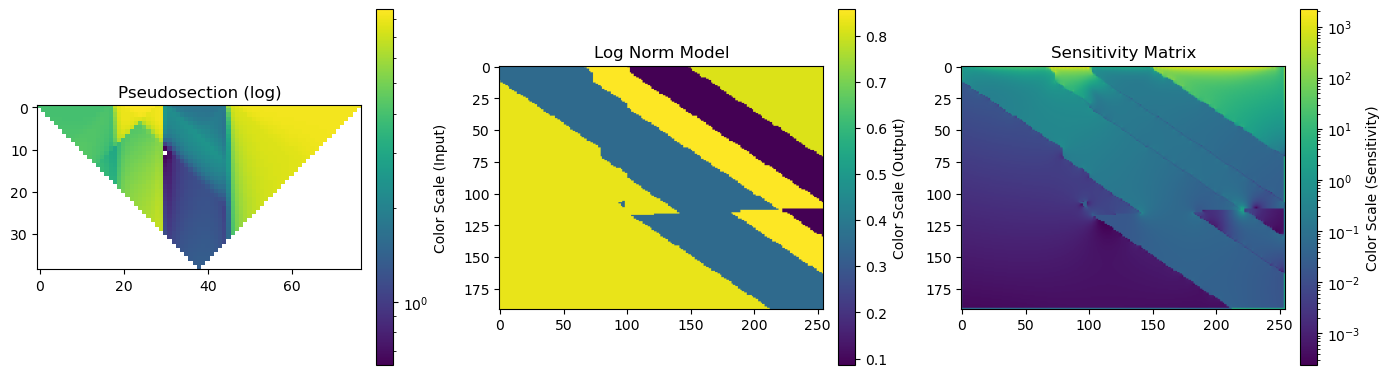

In [49]:
idx = 159
sample = dataset[idx]
print(f"{sample['num_electrode']=}")
print(f"{sample['subsection_length']=}")
print(f"{sample['array_type']=}")
print(f"{sample['pseudosection'].shape=}")
print(f"{sample['norm_log_resistivity_model'].shape=}")
print(f"{sample['JtJ_diag'].shape=}")

pseudosection = torch.log1p(sample['pseudosection'])
non_zero_apparent_resistivities = pseudosection[pseudosection != 0]
vmin = non_zero_apparent_resistivities.min().item()

norm_log_resistivity_model = sample['norm_log_resistivity_model']

sensitivity_matrix = sample['JtJ_diag']
sensitivity_matrix = torch.sqrt(sensitivity_matrix)
print(f"{sensitivity_matrix.sum()=}")

norm_log_resistivity_model = sample['norm_log_resistivity_model']

fig, ax = plt.subplots(1, 3, figsize=(14, 8))

cmap = plt.get_cmap('viridis')  # You can change this to any colormap you prefer.
cmap.set_under('white')

vmin = torch.min(pseudosection[pseudosection != 0]).item()
vmax = torch.max(pseudosection).item()
norm = LogNorm(vmin=vmin, vmax=vmax)
im1 = ax[0].imshow(pseudosection, cmap=cmap, norm=norm)
ax[0].set_title("Pseudosection (log)")
cbar1 = fig.colorbar(im1, ax=ax[0], orientation='vertical', fraction=0.05, pad=0.04)
cbar1.set_label("Color Scale (Input)")

vmin = torch.min(norm_log_resistivity_model).item()
vmax = torch.max(norm_log_resistivity_model).item()
norm = Normalize(vmin=vmin, vmax=vmax)
im2 = ax[1].imshow(norm_log_resistivity_model, norm=norm)
ax[1].set_title("Log Norm Model")
cbar2 = fig.colorbar(im2, ax=ax[1], orientation='vertical', fraction=0.05, pad=0.04)
cbar2.set_label("Color Scale (Output)")

vmin = torch.min(sensitivity_matrix).item()
vmax = torch.max(sensitivity_matrix).item()
norm = LogNorm(vmin=vmin, vmax=vmax)
im3 = ax[2].imshow(sensitivity_matrix, norm=norm)
ax[2].set_title("Sensitivity Matrix")
cbar3 = fig.colorbar(im3, ax=ax[2], orientation='vertical', fraction=0.05, pad=0.04)
cbar3.set_label("Color Scale (Sensitivity)")

plt.tight_layout()
plt.show()